In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Source of data: https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country
df = pd.read_csv('Salary.csv')

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


## Questions that might be interesting from this dataset: 
1. Which country has the widest range in salaries? Is this job-dependent?
2. Which job has the widest salary range, regardless of country?
3. Can we definitively determine a pay gap between people of different genders or different races? Does country play a role in this?
4. Does the title of senior have a noticeable impact on salary? Is this dependent on any other factors? 

In [58]:
df.shape

(6684, 9)

In [5]:
countries = df.Country.unique()

In [6]:
len(df['Job Title'].unique())

129

In [16]:
len(df['Years of Experience'].unique())

37

In [17]:
len(df['Salary'].unique())

437

In [18]:
len(df['Race'].unique())

10

In [26]:
len(df['Education Level'].unique())

4

In [63]:
len(df['Salary'].unique())

437

In [7]:
df.Salary.describe()

count      6684.000000
mean     115307.175194
std       52806.810881
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64

<Axes: xlabel='Salary', ylabel='Count'>

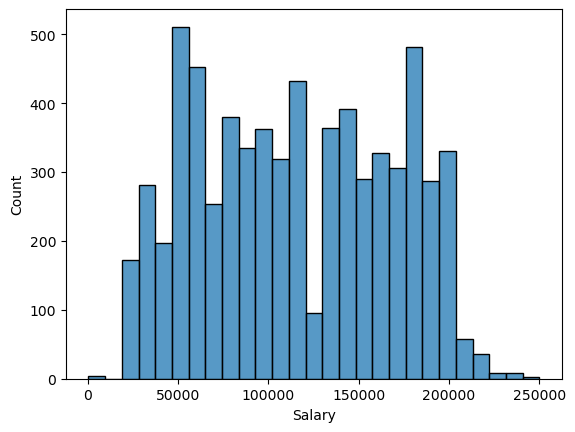

In [8]:
sns.histplot(data=df, x='Salary')

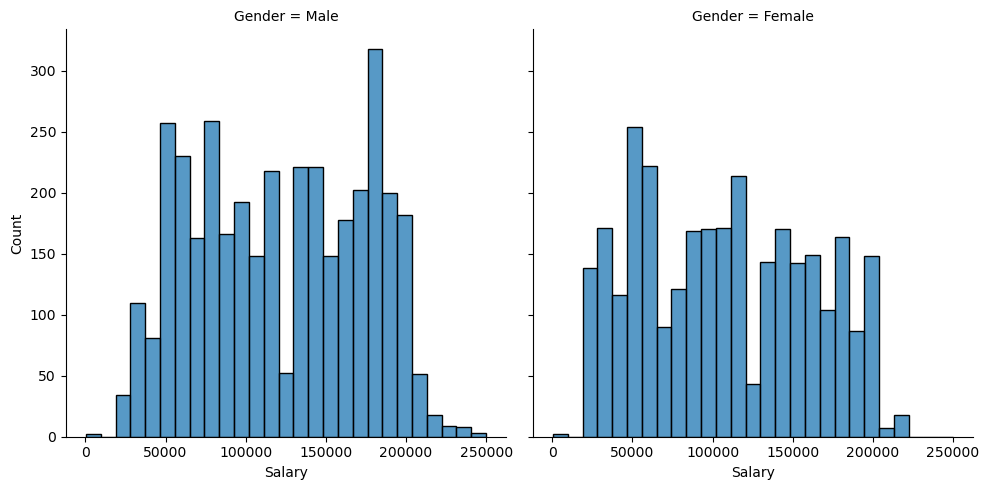

In [14]:
sns.displot(data=df, x='Salary', col='Gender', col_wrap=2)

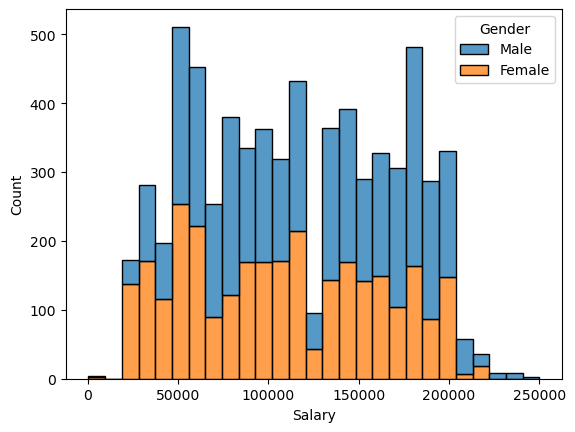

In [67]:
ax = sns.histplot(data=df, x='Salary', hue='Gender', multiple='stack')

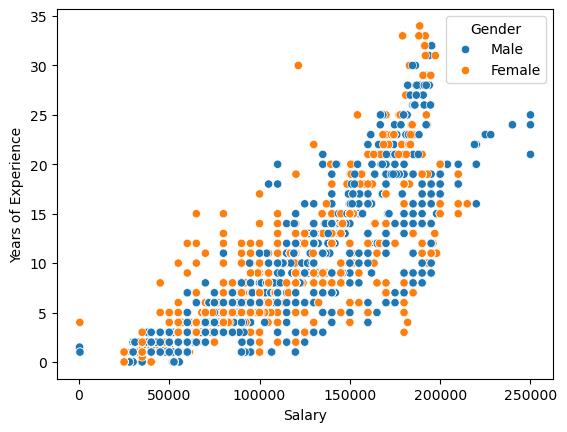

In [68]:
ax = sns.scatterplot(x='Salary', y='Years of Experience', data=df, hue='Gender')

The stacked histogram is more clear than the scatter plot, when comparing gender and salary. From both charts we can see that there is a similar spread between the genders, with the exception of the highest salaries (the final three buckets in the histogram) being populated only by males' salaries. 

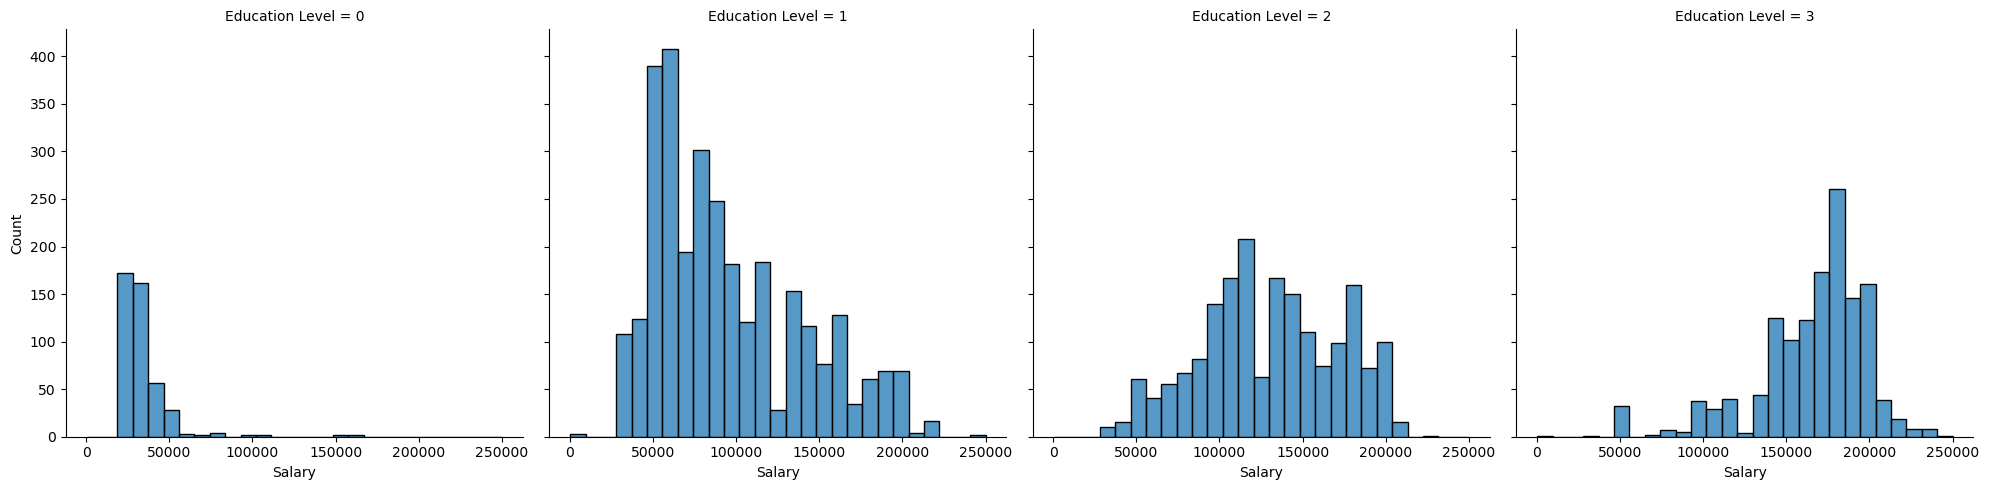

In [28]:
sns.displot(data=df, x='Salary', col='Education Level', col_wrap=4)

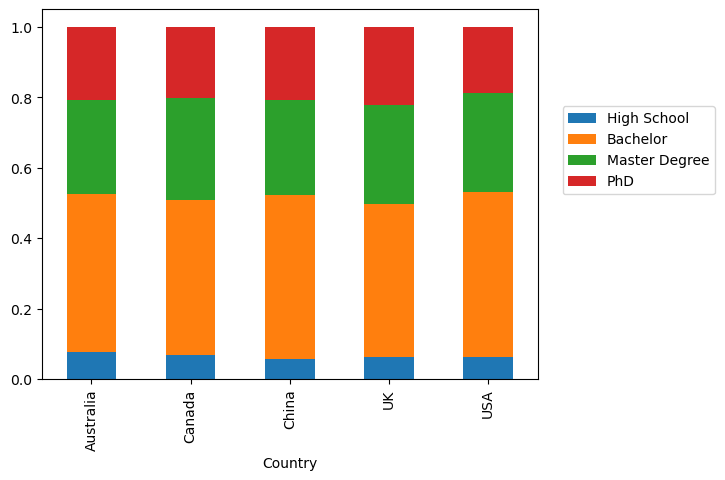

In [90]:
pd.crosstab(df['Country'], df['Education Level'], normalize='index').plot.bar(stacked=True)
plt.legend(['High School', 'Bachelor', 'Master Degree', 'PhD'], loc=(1.05, 0.5))

Education appears to have a fairly predictable effect on salary. The levels are as follows:
- 0 = High School
- 1 = Bachelor Degree
- 2 = Master Degree
- 3 = Phd

People with only a high school degree typically are kept to ~50k or less, with very few exceptions. A bachelor's degree has the greatest spread, including one of the highest salaries, but is right-skewed. Having a master's degree does not appear to give as much of an advantage, and surprisingly the PhDs are left-skewed. I think it would be good to compare the education level to the job title.

The distribution of degrees among the five countries also appears to be roughly even, too.

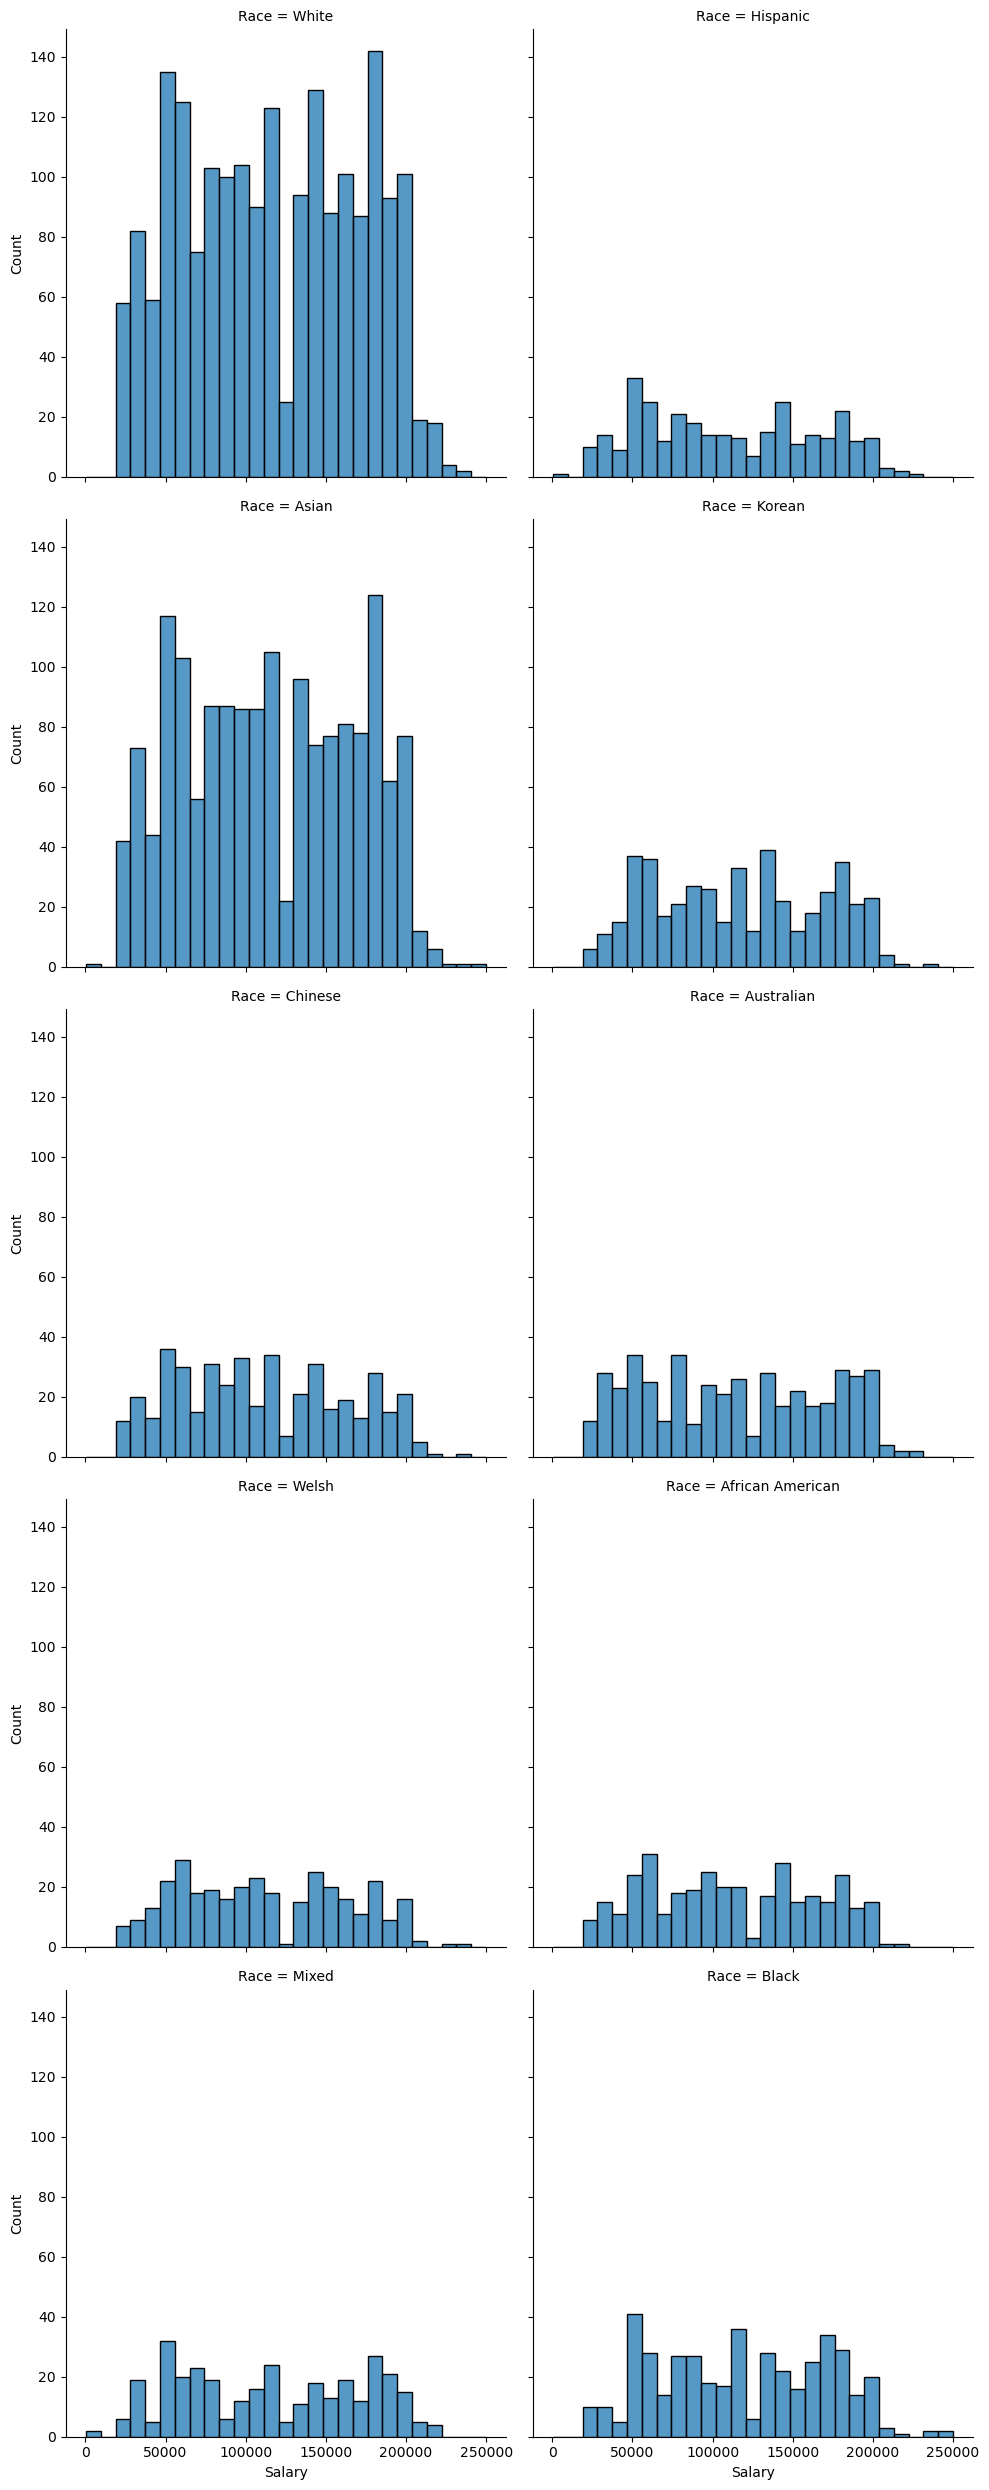

In [30]:
sns.displot(data=df, x='Salary', col='Race', col_wrap=2)

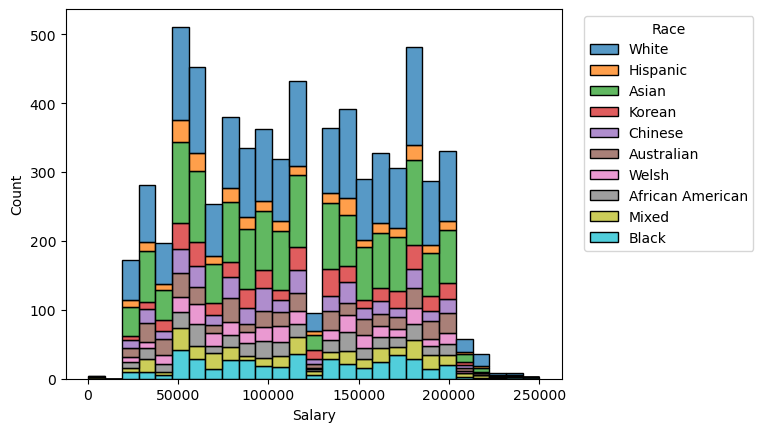

In [25]:
ax = sns.histplot(data=df, x='Salary', hue='Race', multiple='stack')
sns.move_legend(ax, 'upper right', bbox_to_anchor=(1.4, 1))

To better understand the variations of salary among the racial categories, it might be worth aggregating the various buckets, but I don't feel that is a great idea if I don't know the source of the data. A few questions: 
- Why is there a distinction between 'African American' and 'Black'? Is this based on regional surveys? 
- Why do we have some countries (i.e., Australian, Korean, Chinese, Welsh (?!)) and how do they relate to the broader categorizations of the White, Hispanic, Asian, Black groups?

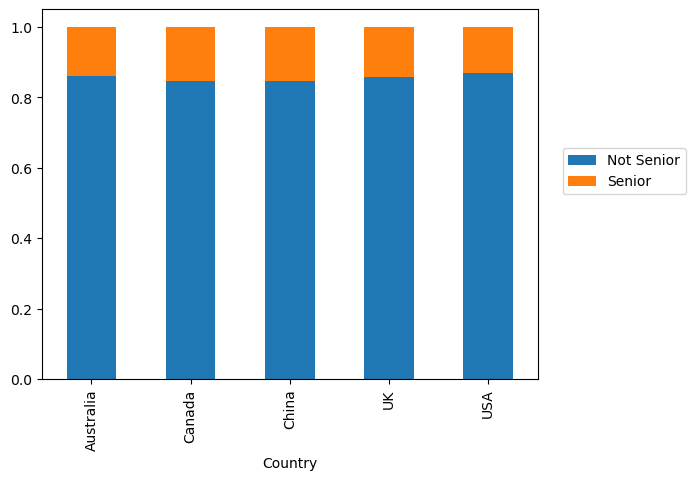

In [87]:
pd.crosstab(df['Country'], df['Senior'], normalize='index').plot.bar(stacked=True)
plt.legend(['Not Senior', 'Senior'], loc=(1.05, 0.5))

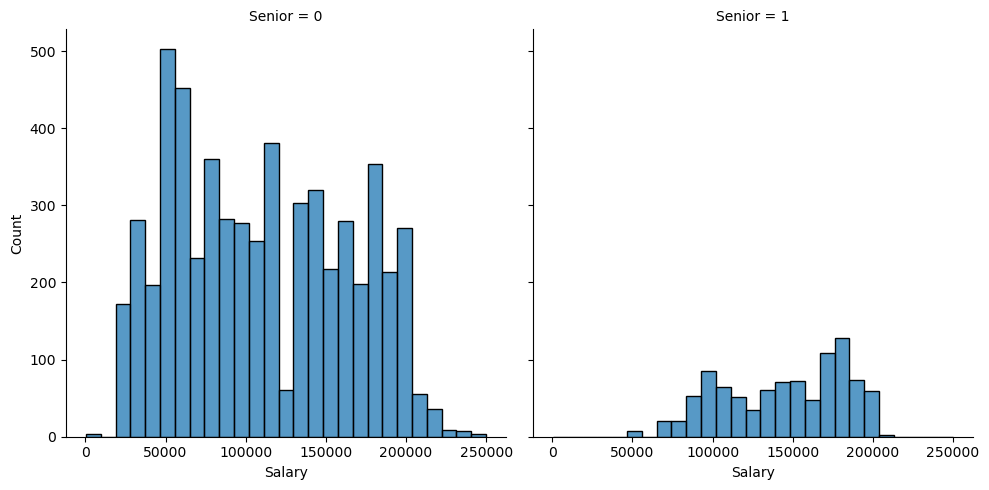

In [29]:
sns.displot(data=df, x='Salary', col='Senior', col_wrap=2)

Interesting that the title of 'senior' is essentially meaningless - the range of salaries is a little tighter, but the maximum salary level appears to be at least 50k below the top range of the non-senior roles. I suspect higher-paying roles don't often have 'senior' in the title (e.g., CEO, CTO), although this categorization is a bit vague. It also appears that only 20% of each country's job level was senior. 

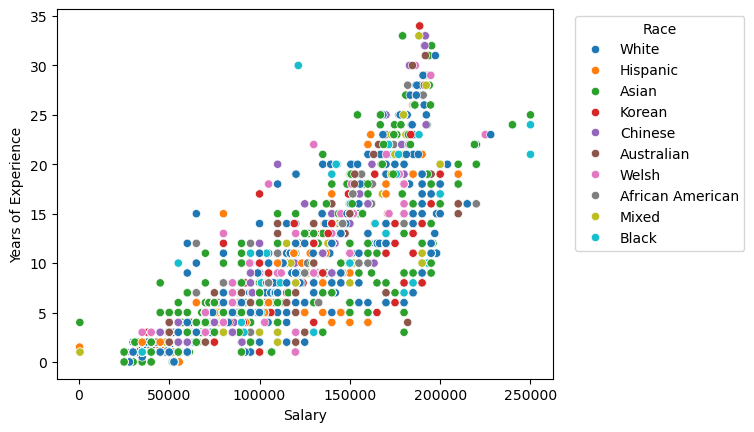

In [62]:
ax = sns.scatterplot(x='Salary', y='Years of Experience', data=df, hue='Race')
sns.move_legend(ax, 'upper right', bbox_to_anchor=(1.4, 1))

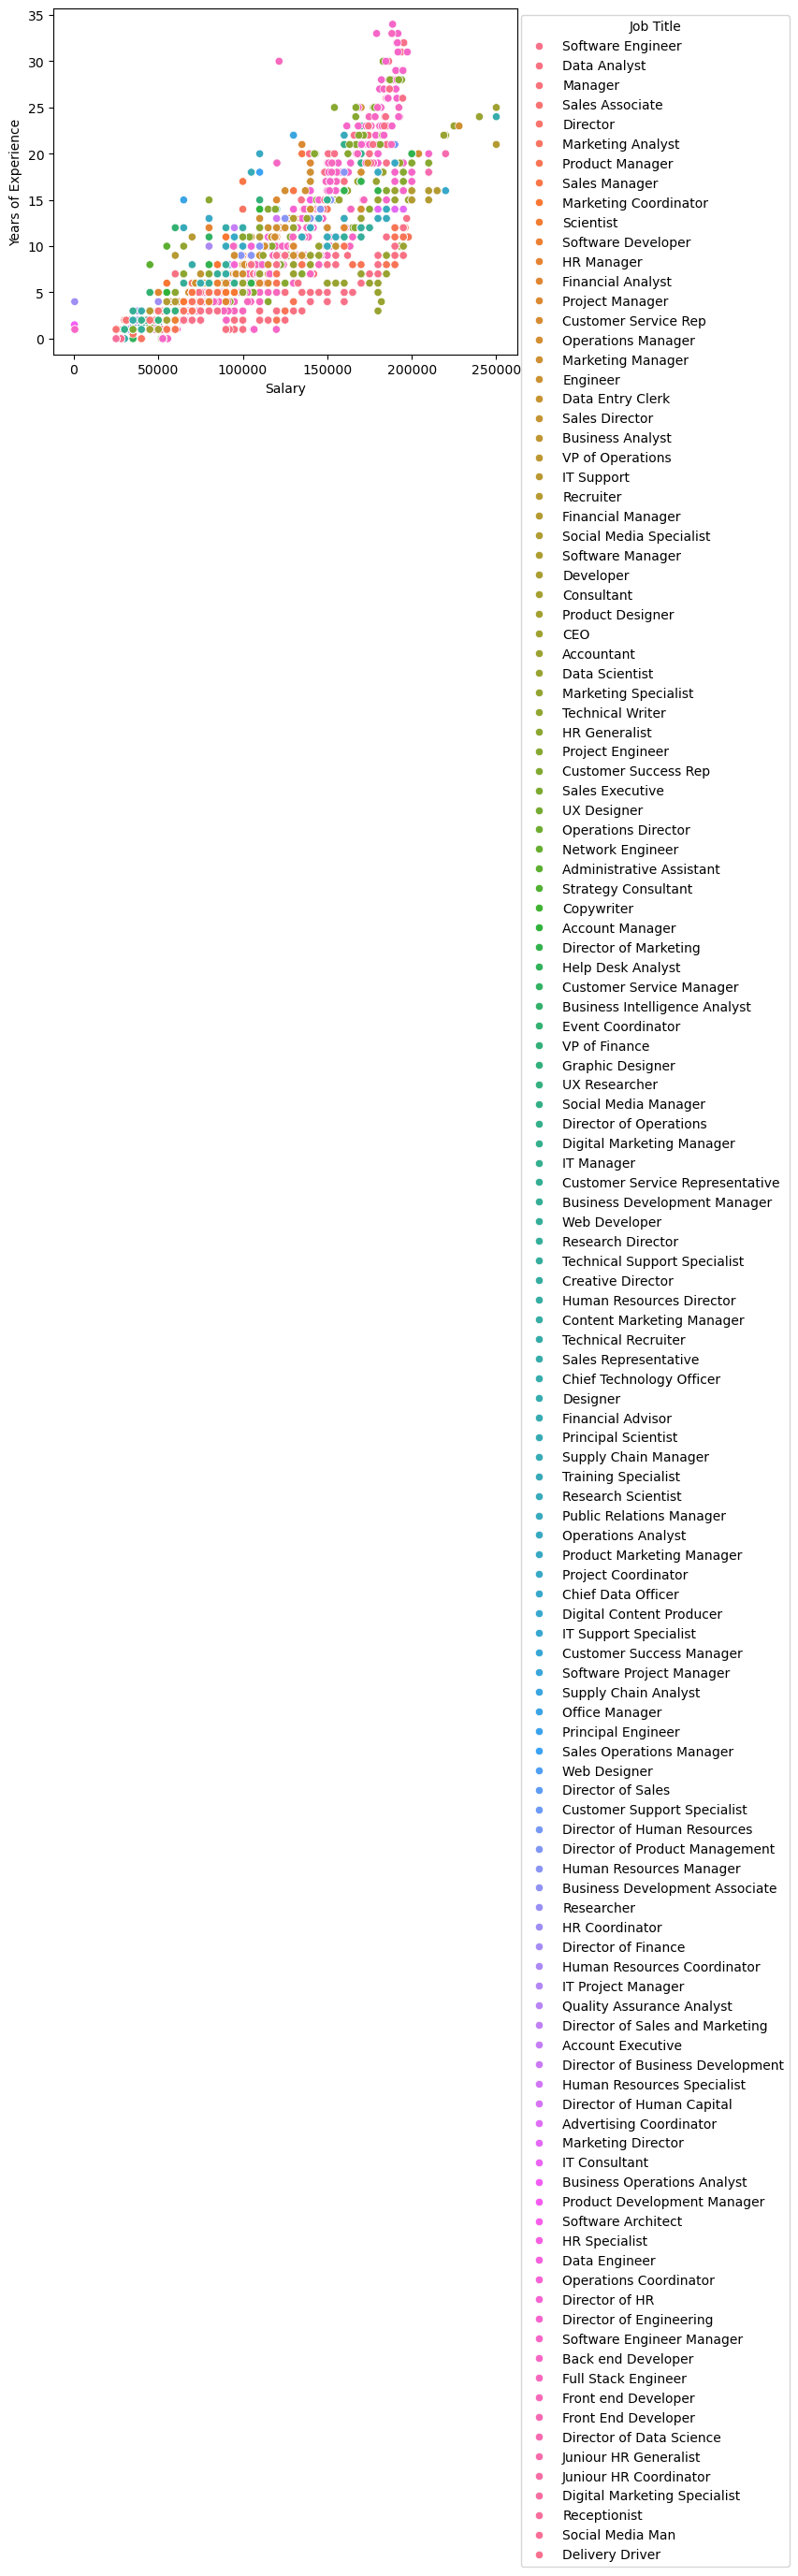

In [71]:
ax = sns.scatterplot(x='Salary', y='Years of Experience', data=df, hue='Job Title')
sns.move_legend(ax, 'upper right', bbox_to_anchor=(1.6, 1))

For both of the scatter plots of Salary vs Years of Experience, the correlation between years of experience and salary appears to be stronger than the correlations between salary and race, or even salary and job title (although this is harder to discern among the 129 different job titles). To get a better idea, I'll now explore the data breakdown between the countries. 

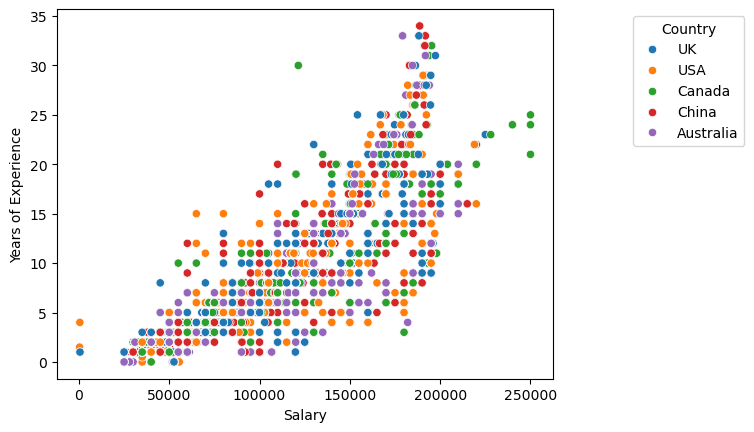

In [72]:
ax = sns.scatterplot(x='Salary', y='Years of Experience', data=df, hue='Country')
sns.move_legend(ax, 'upper right', bbox_to_anchor=(1.4, 1))

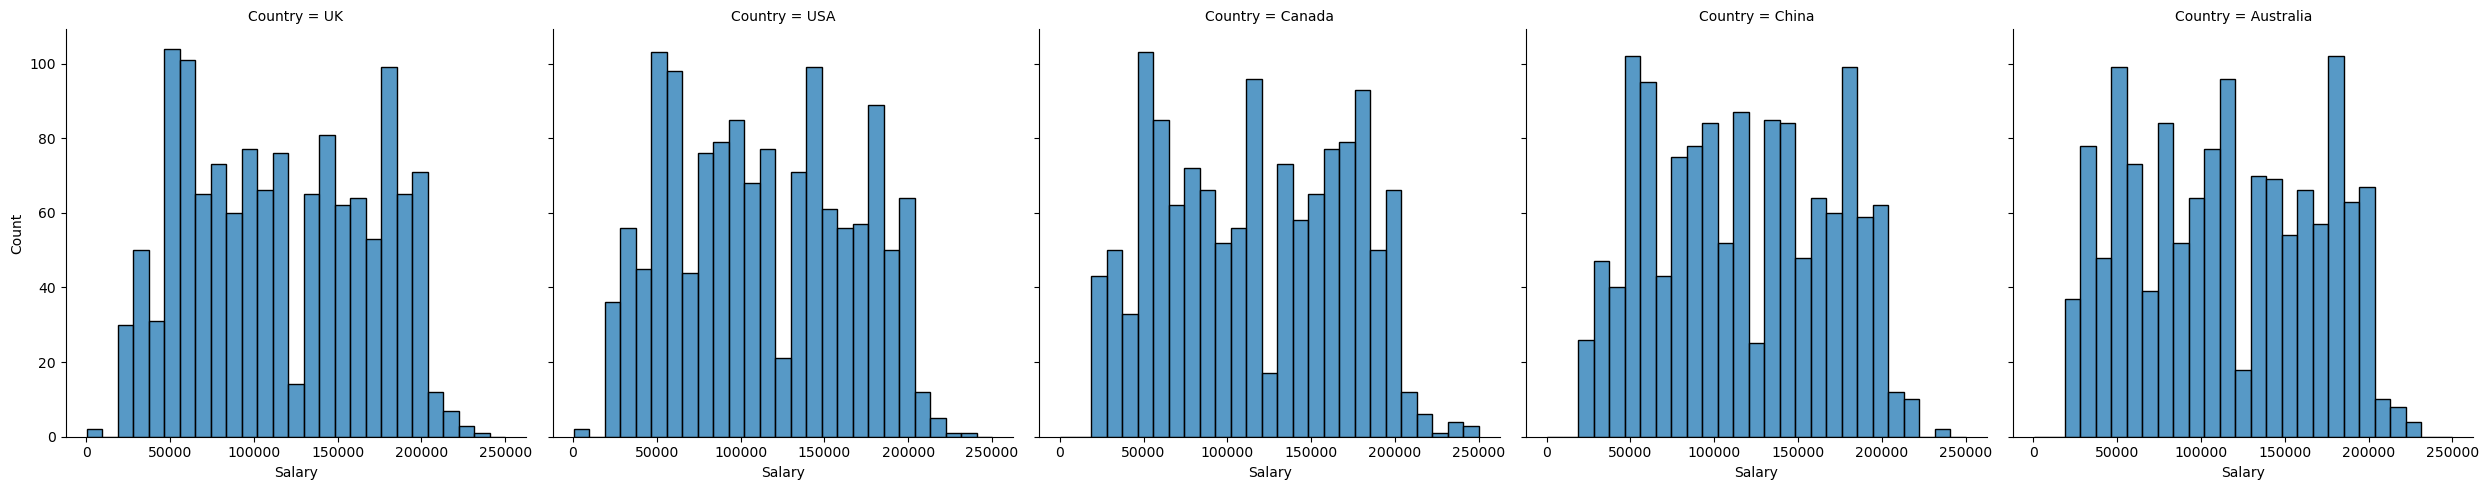

In [73]:
sns.displot(data=df, x='Salary', col='Country', col_wrap=5)

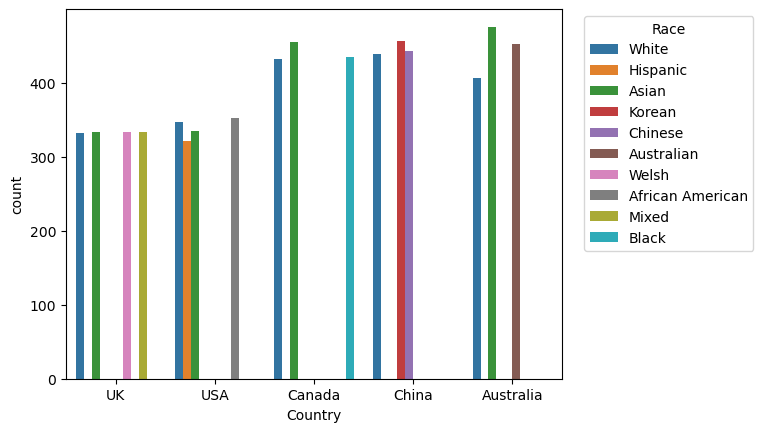

In [77]:
ax = sns.countplot(x='Country', hue='Race', data=df)
sns.move_legend(ax, 'upper right', bbox_to_anchor=(1.4, 1))

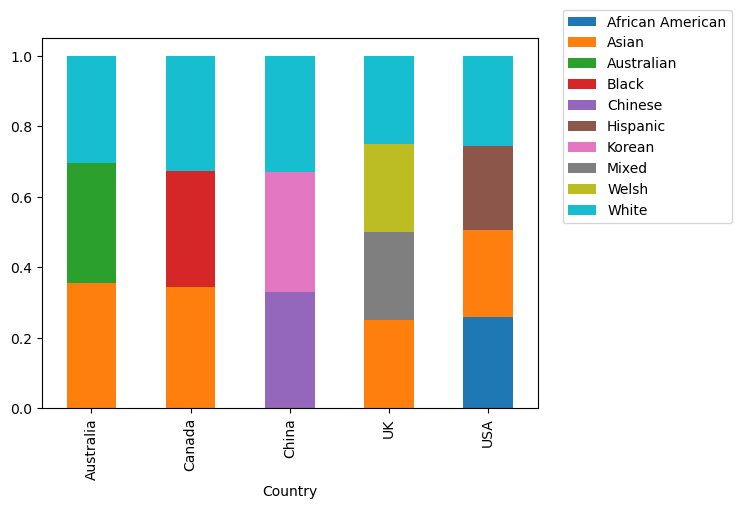

In [80]:
pd.crosstab(df['Country'], df['Race'], normalize='index').plot.bar(stacked=True)
plt.legend(loc=(1.05, 0.5))

I think this is further proof that the Race labels are rather non-sensical. What is 'Australian' vs. 'White' vs. 'Asian', for example? I don't think this part of the dataset is worth further investigation. Also, to compare plot types, I tried the seaborn countplot vs. pandas' crosstab, the latter being more easily interpreted. 

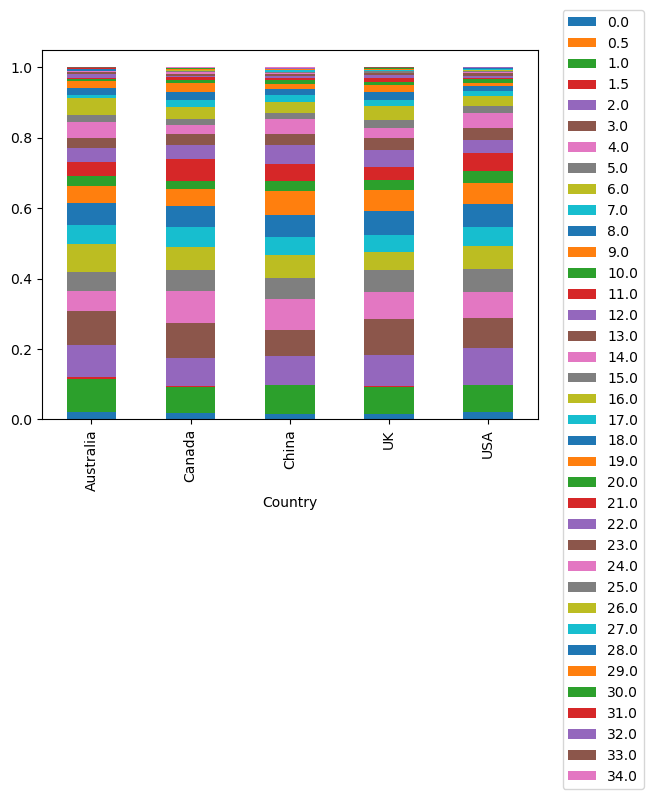

In [83]:
pd.crosstab(df['Country'], df['Years of Experience'], normalize='index').plot.bar(stacked=True)
plt.legend(loc=(1.05, -1))

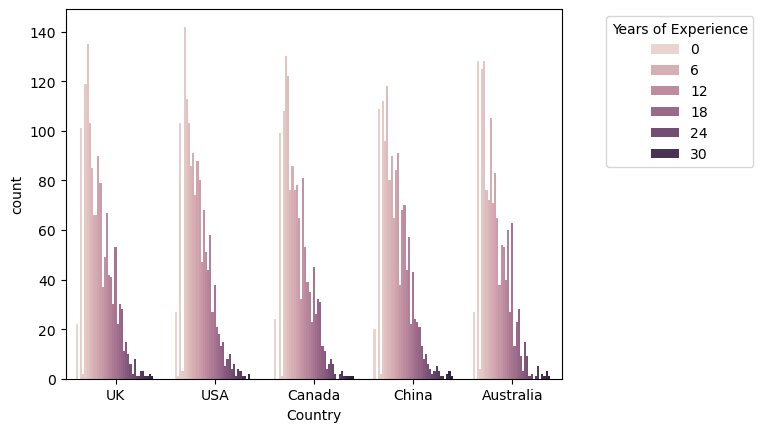

In [84]:
ax = sns.countplot(x='Country', hue='Years of Experience', data=df)
sns.move_legend(ax, 'upper right', bbox_to_anchor=(1.4, 1))

Interestingly, in this case seaborn's countplot is easier to interpret because of the large range of years of experience. The distribution of years of experience appears to be mostly consistent among the countries.

## Answers to the questions posed above: 
- Which country has the widest range in salaries? Is this job-dependent?

  
- Which job has the widest salary range, regardless of country?

  
- Can we definitively determine a pay gap between people of different genders or different races? Does country play a role in this?

  
- Does the title of senior have a noticeable impact on salary? Is this dependent on any other factors?

  